# Assignment 4 - diagnostic systems

- Student 1 - Luca Modica
- Student 2 - Hugo Manuel Alves Henriques E Silva

---

## Import libraries

In [503]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import icecream as ic

sns.set_style('darkgrid')
%matplotlib inline

## Reading and analysing data

In [504]:
df = pd.read_pickle('wdbc.pkl')

In [505]:
df.head()

,id,malignant,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [506]:
dff = df.drop(['id', 'malignant'], axis=1)
corr_df = dff.corr()
corr_df.head()

,radius_0,texture_0,perimeter_0,area_0,smoothness_0,compactness_0,concavity_0,concave points_0,symmetry_0,fractal dimension_0,...,radius_2,texture_2,perimeter_2,area_2,smoothness_2,compactness_2,concavity_2,concave points_2,symmetry_2,fractal dimension_2
radius_0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_0,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_0,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_0,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_0,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


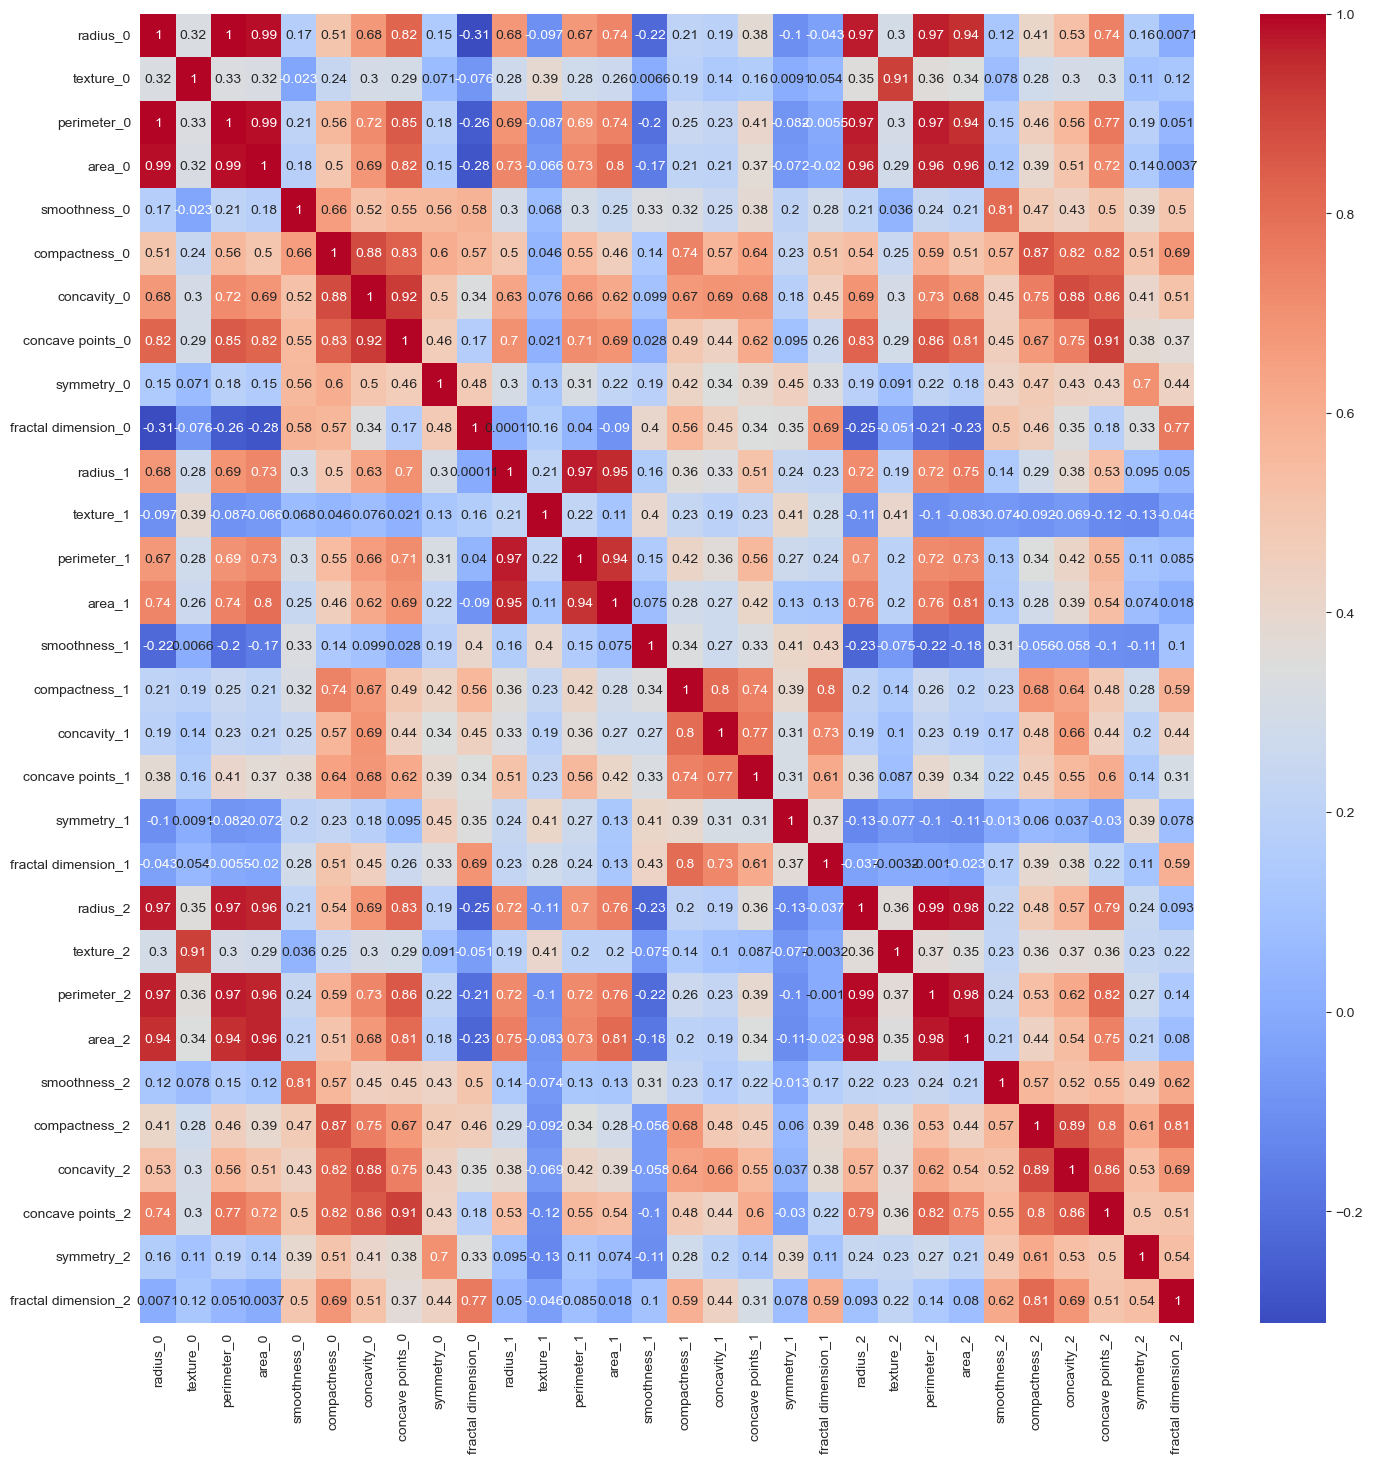

In [507]:
plt.figure(figsize=(17, 17))  # Width: 8 inches, Height: 6 inches

sns.heatmap(data=corr_df, cmap='coolwarm', annot=True)
plt.show()

In [508]:
# for col in [col for col in df.columns if col.endswith('_0')]:
#     plt.figure()
#     df[col].hist(bins=10)
#     plt.title(col)

1) The presence of signiﬁcantly larger cells is evidence for the uncontrolled growth that is indicative of malignant tumors.

This can be represented by `radius` and `area`.

    
2) The shape of benign cells usually shows only limited variance, whereas malignant cells can develop arbitrary structures that do not conform with the general pattern of their surroundings.

This can be represented by `smoothness`, `compactness`, `concativity`, and `concave points`.
   
3) The color of the cell nucleus should be identical for regular cells of the same type. Cancer cells often have signiﬁcantly larger and darker nuclei that are more densely packed with DNA.

????????????

   
4) Regular cells show similar texture. Malignant tumors, on the other hand, can range from smooth surfaces to ragged or lumpy textures for neighbouring cells.

This can be represented by `texture` and `smoothness`.
   
5) Finally, for healthy tissue, cell arrangement tends to be orderly, with regular distances between cells. Cancer cells can spread out or clutter almost arbitrarily.

This can be represented by `symmetry` and `fractal dimension`.




The best
single-plane classifier separated benign from
malignant points based on three nuclear feature
values for each case: mean texture, the worst area,
and the worst smoothness. 

## Model implementation and evaluation

### Model 1 - Rule Based Calssifier

In [509]:
class RuleBasedClassifier:
    def __init__(self):
        self.rules = []

    def add_rule(self, condition, label, else_label="Unknown"):
        self.rules.append((condition, label, else_label))
        return self

    def classify(self, X: pd.DataFrame):
        for condition, label, else_label in self.rules:
            return [label if condition(x) else else_label for _, x in X.iterrows()]


In [510]:
# cell size rule vars

cell_radius_mean = df['radius_0'].mean()
cell_radius_std = df['radius_1'].mean()
cell_radius_worst = df['radius_2'].mean()

cell_perimeter_mean = df['perimeter_0'].mean()
cell_perimeter_std = df['perimeter_1'].mean()
cell_perimeter_worst = df['perimeter_2'].mean()

cell_area_mean = df['area_0'].mean()
cell_area_std = df['area_1'].mean()
cell_area_worst = df['area_2'].mean()

# cell shape rule vars
cell_compactness_mean = df['compactness_0'].mean()
cell_compactness_std = df['compactness_1'].mean()
cell_compactness_worst = df['compactness_2'].mean()

cell_concavity_mean = df['concavity_0'].mean()
cell_concavity_std = df['concavity_1'].mean()
cell_concavity_worst = df['concavity_2'].mean()

cell_concave_points_mean = df['concave points_0'].mean()
cell_concave_points_std = df['concave points_1'].mean()
cell_concave_points_worst = df['concave points_2'].mean()

# cell texture rule vars
cell_texture_mean = df['texture_0'].mean()
cell_texture_std = df['texture_1'].mean()
cell_texture_worst = df['texture_2'].mean()

cell_smoothness_mean = df['smoothness_0'].mean()
cell_smoothness_std = df['smoothness_1'].mean()
cell_smoothness_worst = df['smoothness_2'].mean()

# cell arrangement rule vars
cell_symmetry_mean = df['symmetry_0'].mean()
cell_symmetry_std = df['symmetry_1'].mean()
cell_symmetry_worst = df['symmetry_2'].mean()

cell_fractal_dimension_mean = df['fractal dimension_0'].mean()
cell_fractal_dimension_std = df['fractal dimension_1'].mean()
cell_fractal_dimension_worst = df['fractal dimension_2'].mean()

#----------------------------------#

cell_radius_mean_1 = df[df['malignant'] == 1]['radius_0'].mean()
cell_radius_std_1 = df[df['malignant'] == 1]['radius_1'].mean()
cell_radius_worst_1 = df[df['malignant'] == 1]['radius_2'].mean()

cell_perimeter_mean_1 = df[df['malignant'] == 1]['perimeter_0'].mean()
cell_perimeter_std_1 = df[df['malignant'] == 1]['perimeter_1'].mean()
cell_perimeter_worst_1 = df[df['malignant'] == 1]['perimeter_2'].mean()

cell_area_mean_1 = df[df['malignant'] == 1]['area_0'].mean()
cell_area_std_1 = df[df['malignant'] == 1]['area_1'].mean()
cell_area_worst_1 = df[df['malignant'] == 1]['area_2'].mean()

cell_compactness_mean_1 = df[df['malignant'] == 1]['compactness_0'].mean()
cell_compactness_std_1 = df[df['malignant'] == 1]['compactness_1'].mean()
cell_compactness_worst_1 = df[df['malignant'] == 1]['compactness_2'].mean()

cell_concavity_mean_1 = df[df['malignant'] == 1]['concavity_0'].mean()
cell_concavity_std_1 = df[df['malignant'] == 1]['concavity_1'].mean()
cell_concavity_worst_1 = df[df['malignant'] == 1]['concavity_2'].mean()

cell_concave_points_mean_1 = df[df['malignant'] == 1]['concave points_0'].mean()
cell_concave_points_std_1 = df[df['malignant'] == 1]['concave points_1'].mean()
cell_concave_points_worst_1 = df[df['malignant'] == 1]['concave points_2'].mean()

cell_texture_mean_1 = df[df['malignant'] == 1]['texture_0'].mean()
cell_texture_std_1 = df[df['malignant'] == 1]['texture_1'].mean()
cell_texture_worst_1 = df[df['malignant'] == 1]['texture_2'].mean()

cell_smoothness_mean_1 = df[df['malignant'] == 1]['smoothness_0'].mean()
cell_smoothness_std_1 = df[df['malignant'] == 1]['smoothness_1'].mean()
cell_smoothness_worst_1 = df[df['malignant'] == 1]['smoothness_2'].mean()

cell_symmetry_mean_1 = df[df['malignant'] == 1]['symmetry_0'].mean()
cell_symmetry_std_1 = df[df['malignant'] == 1]['symmetry_1'].mean()
cell_symmetry_worst_1 = df[df['malignant'] == 1]['symmetry_2'].mean()

cell_fractal_dimension_mean_1 = df[df['malignant'] == 1]['fractal dimension_0'].mean()
cell_fractal_dimension_std_1 = df[df['malignant'] == 1]['fractal dimension_1'].mean()
cell_fractal_dimension_worst_1 = df[df['malignant'] == 1]['fractal dimension_2'].mean()

#----------------------------------#

cell_radius_mean_0 = df[df['malignant'] == 0]['radius_0'].mean()
cell_radius_std_0 = df[df['malignant'] == 0]['radius_1'].mean()
cell_radius_worst_0 = df[df['malignant'] == 0]['radius_2'].mean()

cell_area_mean_0 = df[df['malignant'] == 0]['area_0'].mean()
cell_area_std_0 = df[df['malignant'] == 0]['area_1'].mean()
cell_area_worst_0 = df[df['malignant'] == 0]['area_2'].mean()

In [511]:
# rules
# def abnormal_cell_size(x):
#     return (abs(x['radius_0'] - cell_radius_mean) > cell_radius_std or x['radius_2'] > cell_radius_worst) and \
#     (abs(x['perimeter_0'] - cell_perimeter_mean) > cell_perimeter_std or x['perimeter_2'] > cell_perimeter_worst) and \
#     (abs(x['area_0'] - cell_area_mean) > cell_area_std or x['area_2'] > cell_area_worst)
    
def abnormal_cell_size(x):
    return abs(x['radius_0'] - cell_radius_mean) > cell_radius_std and x['radius_2'] > cell_radius_worst and \
        abs(x['area_0'] - cell_area_mean) > cell_area_std and x['area_2'] > cell_area_worst

    
def abnormal_cell_shape(x):
    return abs(x['compactness_0'] - cell_compactness_mean) > cell_compactness_std and x['compactness_2'] > cell_compactness_worst and \
    abs(x['smoothness_0'] - cell_smoothness_mean) > cell_smoothness_std and x['smoothness_2'] > cell_smoothness_worst and \
    abs(x['concavity_0'] - cell_concavity_mean) > cell_concavity_std and x['concavity_2'] > cell_concavity_worst and \
    abs(x['concave points_0'] - cell_concave_points_mean) > cell_concave_points_std and x['concave points_2'] > cell_concave_points_worst

def abnormal_cell_texture(x):
    return abs(x['texture_0'] - cell_texture_mean_1) > cell_texture_std_1 and x['texture_2'] > cell_texture_worst_1 and \
    abs(x['smoothness_0'] - cell_smoothness_mean) > cell_smoothness_std and x['smoothness_2'] > cell_smoothness_worst

def abnormal_cell_arrangement(x):
    return abs(x['symmetry_0'] - cell_symmetry_mean) > cell_symmetry_std and x['symmetry_2'] > cell_symmetry_worst and \
    abs(x['fractal dimension_0'] - cell_fractal_dimension_mean) > cell_fractal_dimension_std and x['fractal dimension_2'] > cell_fractal_dimension_worst
    
def rule(x):
    return abnormal_cell_size(x) or abnormal_cell_shape(x) or abnormal_cell_arrangement(x) or abnormal_cell_texture(x)

In [512]:
from sklearn.metrics import classification_report

classifier = RuleBasedClassifier()
classifier.add_rule(rule, 1, 0)
y_pred = classifier.classify(df)
y_true = df['malignant']

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       357
           1       0.89      0.88      0.89       212

    accuracy                           0.92       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569



### Model 2 - Random Forest

- create "size" column and "shape" column with feature engineering
- try a simpler model (aka with less features) and see if it performs better

In [528]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [514]:
# hyperparameters chosen using RandomizedSearchCV
hyperparameters = {
  "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
  "max_depth": [int(x) for x in np.linspace(10, 110, num = 11)],
  "min_samples_split": [2, 5, 10],
  "max_features": ['log2', 'sqrt']
}


In [515]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('malignant', axis=1), df['malignant'], test_size=0.2, random_state=42)

In [517]:
clf = RandomizedSearchCV(RandomForestClassifier(), hyperparameters, n_iter=100, cv=5, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [518]:
clf.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'max_features': 'sqrt',
 'max_depth': 60}

In [519]:
y_pred = clf.predict(X_test)

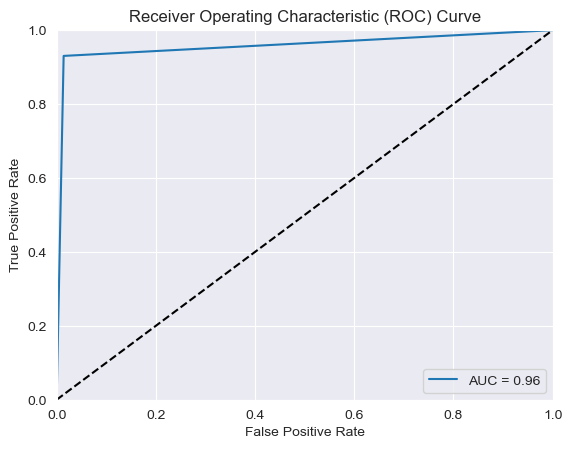

In [529]:
# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [521]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



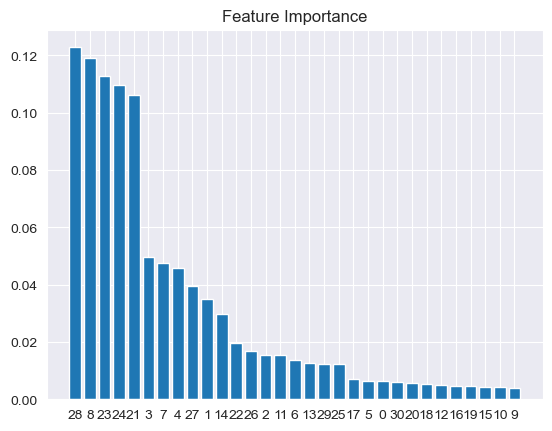

In [523]:
# model interpretation
# Get feature importances
importances = clf.best_estimator_.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), indices)
plt.show()

### Model 3 - classifier with interpretability and classification performance